# Cross Validation

In [9]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [10]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Segregating variables - Dependent & Independent

In [11]:
#separating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

#### Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

D:\Anaconda setup\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda setup\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

### Importing KNN

In [14]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking Consistency , using Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.75      , 0.76470588, 0.74626866, 0.7761194 , 0.65671642,
       0.80597015, 0.86363636, 0.8030303 , 0.81818182, 0.74242424])

In [16]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(77.27053236491341, 5.293691037358145)

### Automating the process of cross validation for different K-Neighbors

In [42]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [41]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

std
mean

[0.7384840503365526,
 0.7503139383297418,
 0.772705323649134,
 0.777138372309575,
 0.7666227685103892,
 0.7741532976827094,
 0.7844700295314869,
 0.7846476175273366,
 0.7725942480112804,
 0.7846010588767393,
 0.7785417830632931,
 0.7890128235826215,
 0.7754895309548514,
 0.7934019740867854,
 0.7725729640567218,
 0.7829315986910368,
 0.7755134754037301,
 0.7859605714741799,
 0.7815275228137388,
 0.7725483544842632,
 0.7725264054061245,
 0.7740635059994146,
 0.7785198339851545,
 0.7754669167531328,
 0.7800349855003059,
 0.7785191688615745,
 0.781593370048155,
 0.7723913853193924,
 0.7694947721286616,
 0.7768696623832708,
 0.7725024609572457,
 0.7739511001144013,
 0.771009258520233,
 0.772479846755527,
 0.768046132971506,
 0.7755101497858301,
 0.7724578976773884,
 0.7649719317849256,
 0.7665096975017958,
 0.7680680820496448,
 0.7650603932210605,
 0.7695167212068001,
 0.7650830074227791,
 0.7665768749833718,
 0.7591128581690478,
 0.763613749434645,
 0.757686833213611,
 0.7635691861547875,


### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

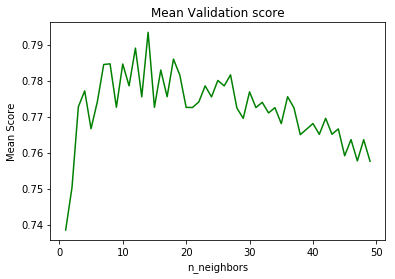

In [35]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deaviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

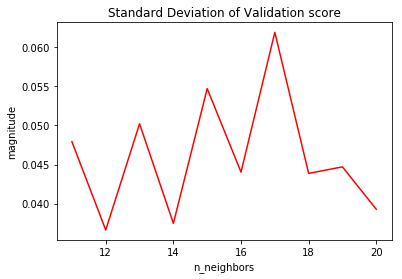

In [24]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [44]:
clf = KNN(n_neighbors = 13 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.8071748878923767, 0.811377245508982)